# Exploration
Suite au nettoyage de données effectué précedemment, il est désormais temps d'explorer en détails notre jeu de données afin de mieux le connaître et de préparer une futur modèle.

In [1]:
# Importons les librairies dont nous avons besoin.

import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-muted')
import numpy as np

In [2]:
data = pd.read_csv("clean_data.csv", header=0)
data.head()

,product_name,brands_tags,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Lion Peanut x2,sunridge,1.0,0.0,e,451.92,20.00,12.5,70.00,57.5,2.5,2.50,0.09652,0.038000,22.0
1,Pack de 2 Twix,"twix,lundberg",NaN,NaN,NaN,355.44,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN
2,Mini Confettis,alice-delice,NaN,NaN,d,420.72,NaN,0.8,NaN,87.7,0.9,0.60,0.01000,0.003937,14.0
3,Praliné Amande Et Noisette,alice-delice,NaN,NaN,d,577.44,NaN,2.9,NaN,50.3,3.9,9.50,0.00300,0.001181,14.0
4,"Pepsi, Nouveau goût !",pepsi,2.0,0.0,e,42.48,0.00,0.0,10.40,10.4,0.0,0.00,0.02540,0.010000,13.0


## Analyse globale

Commençons tout d'abord par une analyse générale de la répartition de chacune de nos mesures.


In [3]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,41300.000000,41300.000000,61040.000000,44262.000000,59007.000000,44220.000000,59069.000000,43349.000000,60835.000000,59102.000000,59101.000000,58072.000000
mean,2.046102,0.078789,266.836209,13.019969,5.401223,27.556002,13.255762,2.502047,7.761921,1.134374,0.446612,8.639947
std,2.619516,0.273516,187.421616,16.457121,8.421374,27.201240,18.851199,4.286048,7.800804,3.960000,1.559073,9.034174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,103.200000,1.300000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,0.031496,1.000000
50%,1.000000,0.000000,247.680000,6.700000,2.000000,14.500000,4.000000,1.300000,6.000000,0.560000,0.220472,9.000000
75%,3.000000,0.000000,393.600000,20.600000,7.400000,53.000000,17.200000,3.200000,11.000000,1.244600,0.490000,15.000000
max,31.000000,2.000000,2395.920000,100.000000,100.000000,100.000000,100.000000,100.000000,94.700000,100.000000,39.370079,40.000000


Si les valeurs nutritives ont une distribution attendue on peut voir que les additifs et les ingrédients contenant
de l'huile de palme sont rares. Il serait intéressant d'observer si ces indicateurs sont corrélés avec le grade. Nous nous attarderons sur ce point dans l'analyse univariée.

## Nutritional grade-score

Puisqu'il s'agit des indicateurs qualité de nos ingrédients et des colonnes Y de notre futur modèle regardons la distribution des deux variables de score/grade.

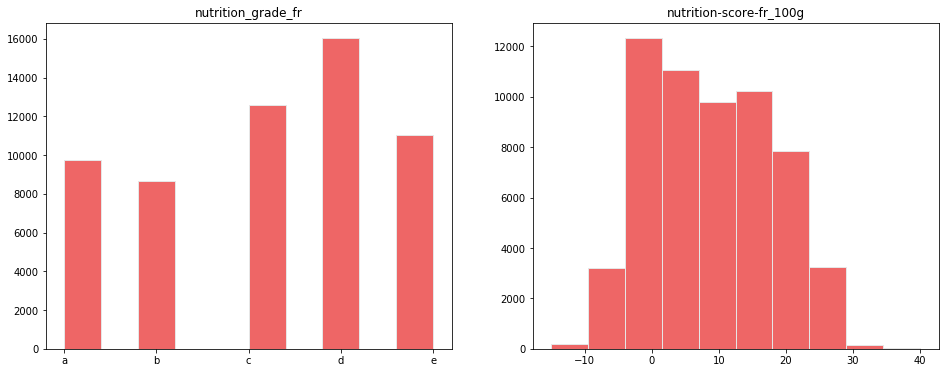

In [4]:
fig = plt.figure(figsize=(16,6))

i = 0
for colonne in ["nutrition_grade_fr", "nutrition-score-fr_100g"]:
    fig.add_subplot(1,2,i+1)
    data[colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

Si de nombreux aliments ont un score positif, leur grade est près de la moitié du temps supérieur ou égale à d. Ces
deux indicateurs bien que très proches apportent des informations différentes (continues ou discrètes) et semblent
suivre une loi normale. Il est à noter que la répartition est effectuée comme suit :
- a de -15 à -2 
- b de -1 à 3 
- c de 4 à 11 
- d de 12 à 16 
- e de 17 à 40

## Analyse univariée
Maintenant que nous avons posé le contexte, attardons nous sur l'analyse univariée de notre dataset en nous focalisant sur les colonnes de nutrition. 

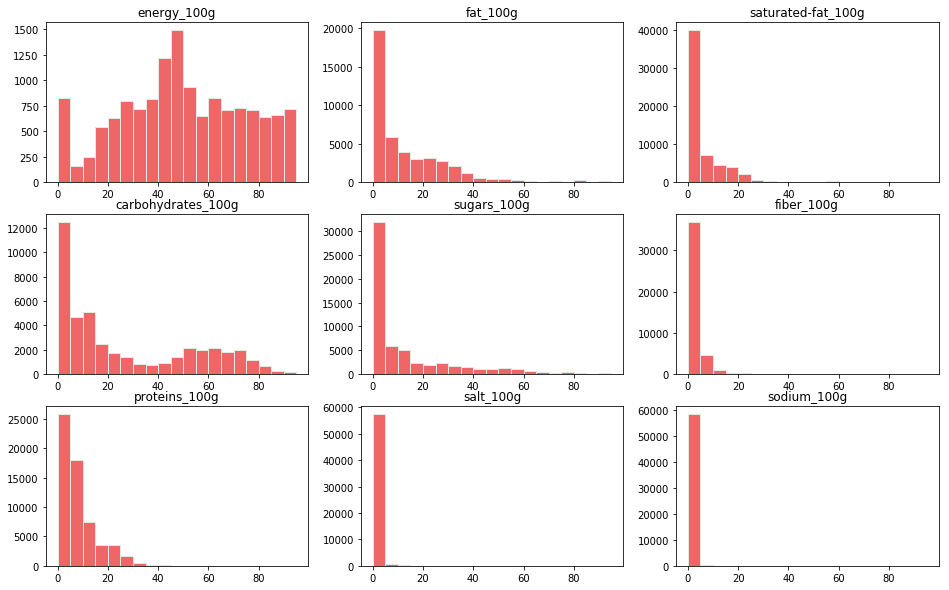

In [5]:
fig = plt.figure(figsize=(16,10))

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1]:
    fig.add_subplot(3,3,i+1)
    data[~np.isnan(data[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666', bins=range(0, 100, 5))
    plt.title(colonne)
    plt.grid(False)
    i += 1

On remarque que :

- La plupart des produits contiennent peu de gras ou de gras saturés.

- Beaucoup d'aliments contiennent au moins un peu de sucre. Mais là encore la plupart en sont pauvres.

- Quelques produits ont des apports en protéine, élément essentiel pour la masse musculaire.

- La distribution des carbohydrates est légérement bimodale mais tend à gauche. Sa forme ressemble à celle de l'énergie.

Il serait intéressant de regarder si la distribution est là même selon le grade de 
nutrition. Réalisons donc à nouveau notre étude mais en distingant désormais à chaque fois les graphes selon le grade.

### Pour le grade a :

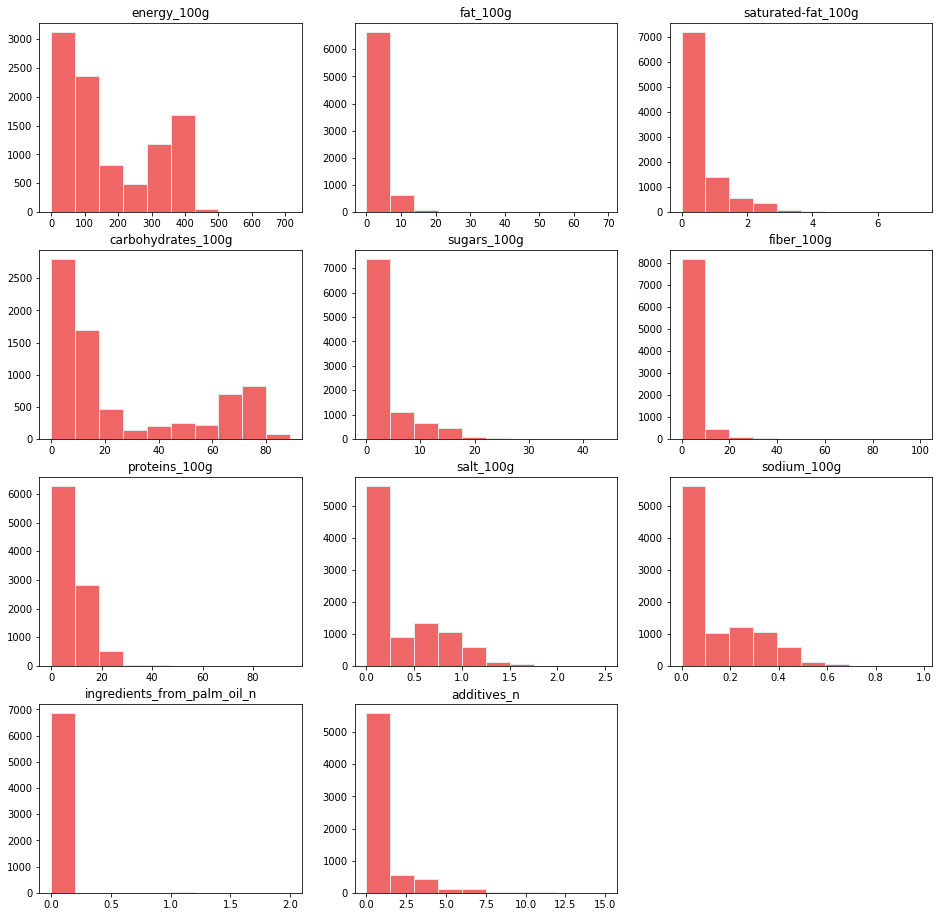

In [6]:
fig = plt.figure(figsize=(16, 16))
grade_a = data[data["nutrition_grade_fr"] == "a"]

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1] + ["ingredients_from_palm_oil_n", "additives_n"]:
    fig.add_subplot(4,3,i+1)
    grade_a[~np.isnan(grade_a[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

### Pour le grade b :

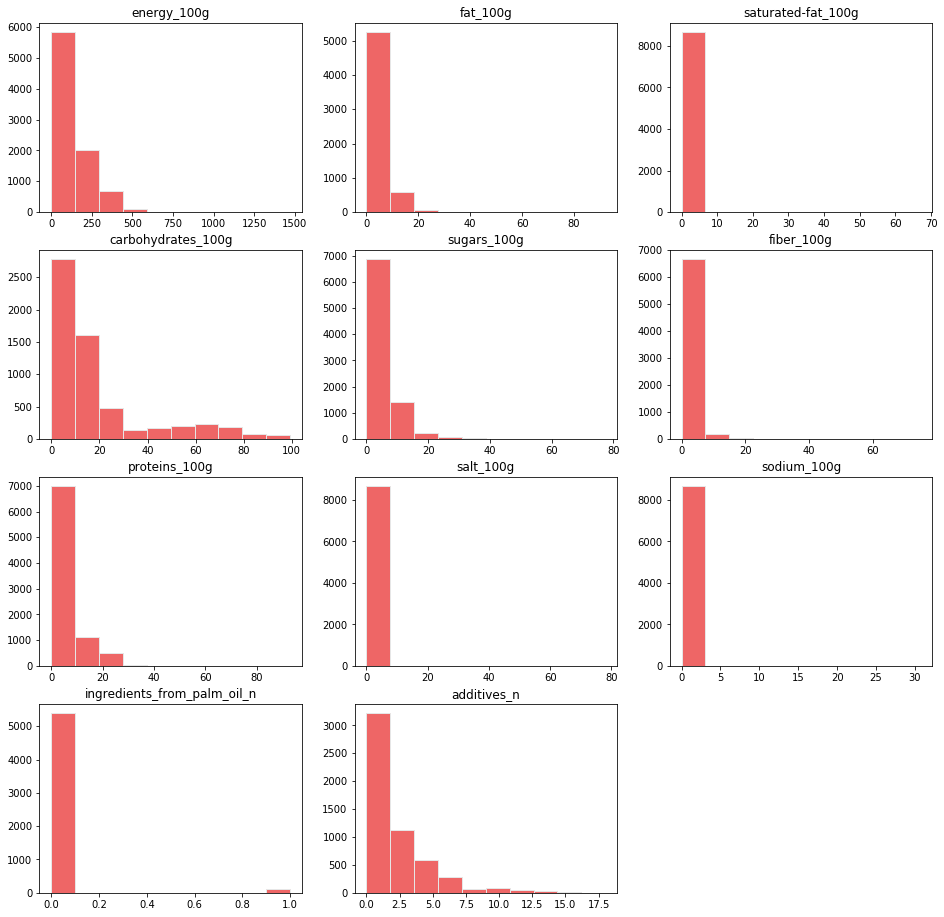

In [7]:
fig = plt.figure(figsize=(16, 16))
grade_b = data[data["nutrition_grade_fr"] == "b"]

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1] + ["ingredients_from_palm_oil_n", "additives_n"]:
    fig.add_subplot(4,3,i+1)
    grade_b[~np.isnan(grade_b[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

### Pour le grade c :

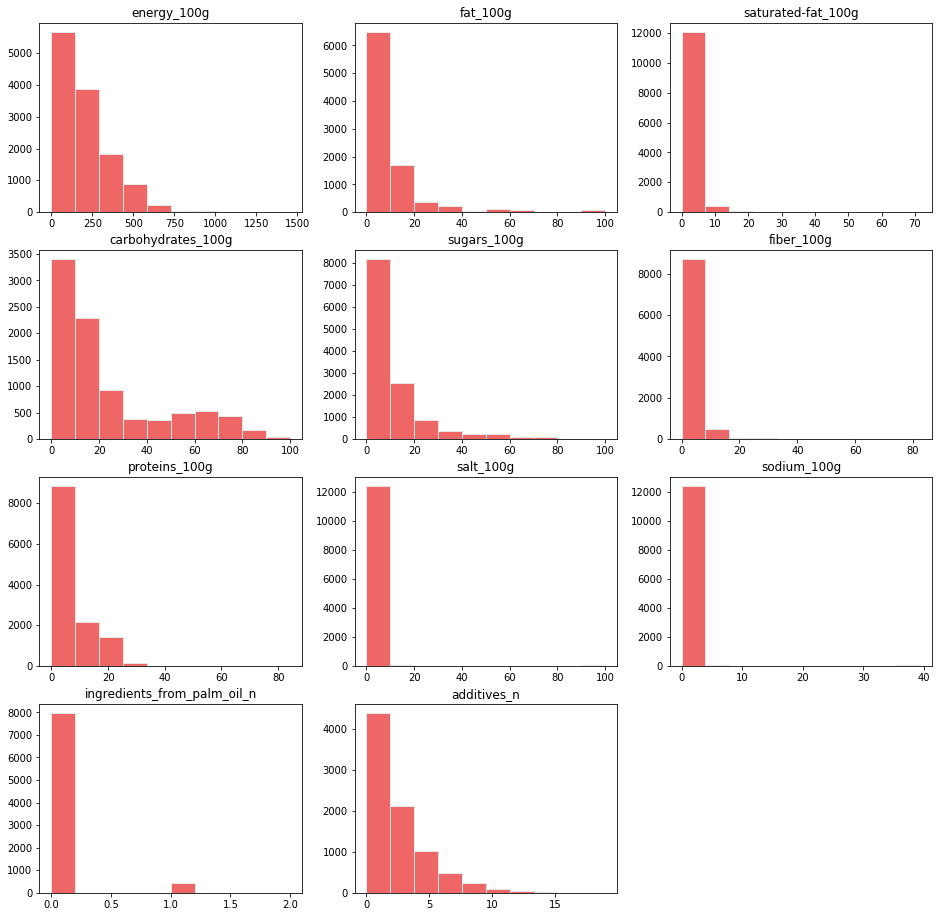

In [8]:
fig = plt.figure(figsize=(16, 16))
grade_c = data[data["nutrition_grade_fr"] == "c"]

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1] + ["ingredients_from_palm_oil_n", "additives_n"]:
    fig.add_subplot(4,3,i+1)
    grade_c[~np.isnan(grade_c[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

### Pour le grade d :

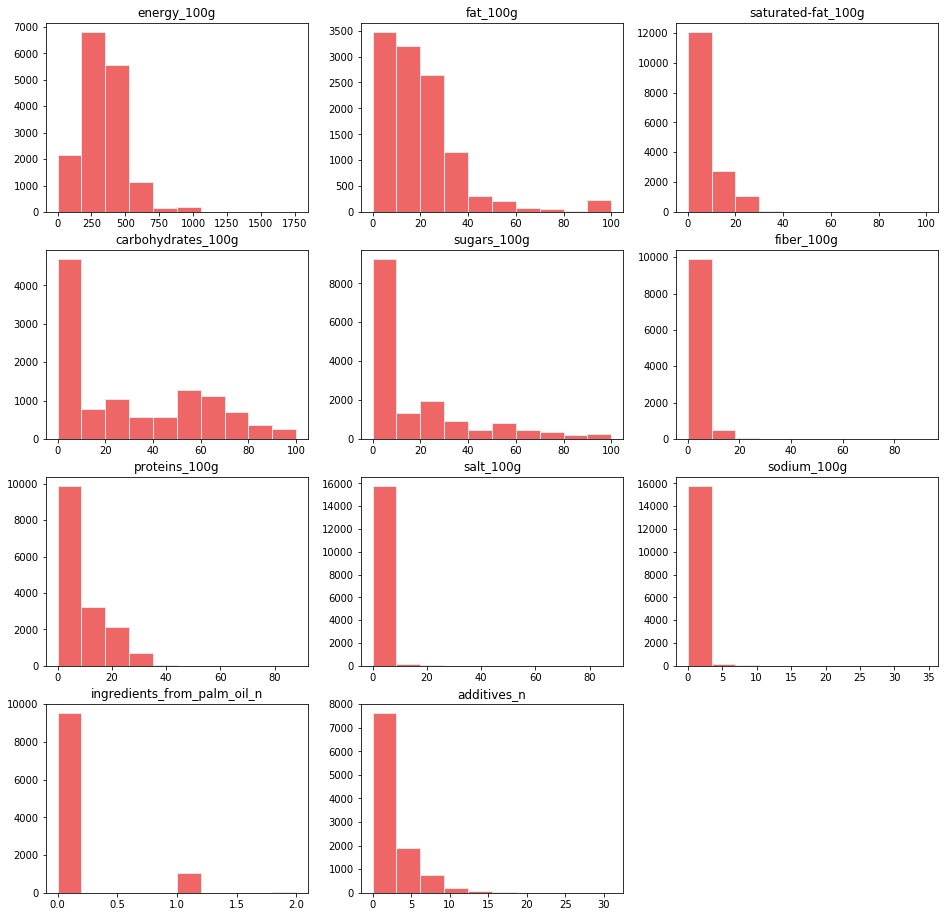

In [9]:
fig = plt.figure(figsize=(16, 16))
grade_d = data[data["nutrition_grade_fr"] == "d"]

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1] + ["ingredients_from_palm_oil_n", "additives_n"]:
    fig.add_subplot(4,3,i+1)
    grade_d[~np.isnan(grade_d[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

### Pour le grade e :

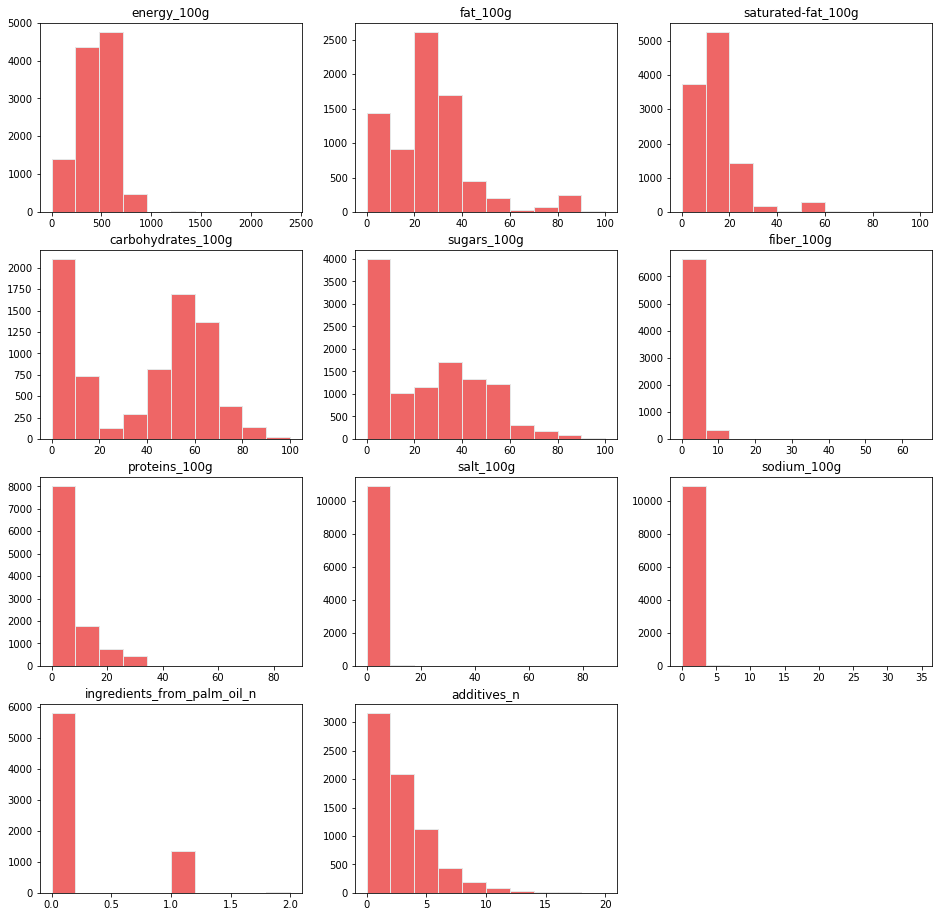

In [10]:
fig = plt.figure(figsize=(16, 16))
grade_e = data[data["nutrition_grade_fr"] == "e"]

i = 0
for colonne in [col for col in data.columns if '100' in col][:-1] + ["ingredients_from_palm_oil_n", "additives_n"]:
    fig.add_subplot(4,3,i+1)
    grade_e[~np.isnan(grade_e[colonne])][colonne].hist(edgecolor='#E6E6E6', color='#EE6666')
    plt.title(colonne)
    plt.grid(False)
    i += 1

Comme attendu, les sucres, gras et sodium sont très faibles pour les produits de grade a et plus élevés au fur et 
à mesure de l'augmentation du grade alors que les fibres ont un comportement inverse.

La présence d'additifs et d'huile de palme augmentent globalement avec le grade.

Etudions cela plus en détails à l'aide de boxplots dans la partie suivante.

Les carbohydrates ainsi que les protéines semblent avoir un comportement plus complexes à analyser. Nous nous attarderons dessus dans l'analyse multivariée.

## Boxplots

### Sucre et fibres

Tout d'abord essayons de synthétiser à l'aide de boites à moustaches nos résultats pour le sucre et les fibres, par
exemple, afin de bien visualiser les variations des valeurs nutritives en fonction du grade.

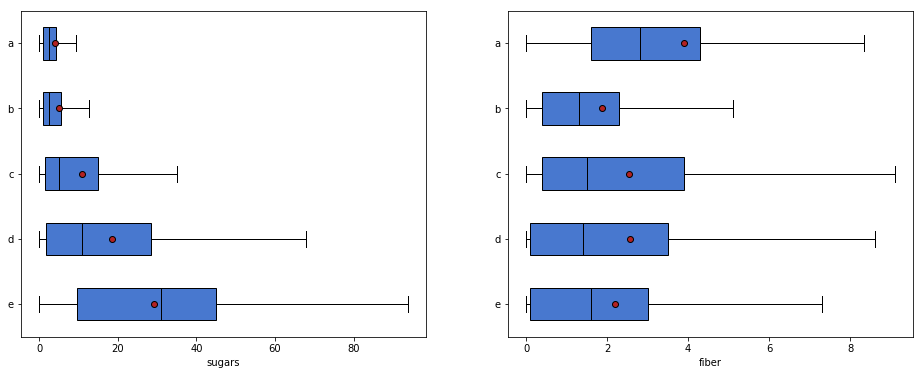

In [11]:
modalites = ["e", "d", "c", "b", "a"]
plt.figure(figsize=[16,6])

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]['sugars_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(1, 2, 1)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('sugars')
    
groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]['fiber_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(1, 2, 2)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('fiber')

plt.show()

On voit ici de façon immédiate la forte corrélation entre le sucre et le grade ainsi que la corrélation négative des
fibres avec le grade.

Représenter ici les boxplots sur un seul graphe nous permet d'avoir une vision globale bien plus rapidement.

### Additifs et Huile de palme

Essayons de voir désormais si la variation du grade selon le nombre d'additifs et selon le nombre d'ingrédients contenant de l'huile de palme est linéaire.

Nous devons dans un premier temps choisir le range sur lequel représenter notre boite à moustache. Visualisons donc la répartition de ces deux variables à l'aide de pie charts.

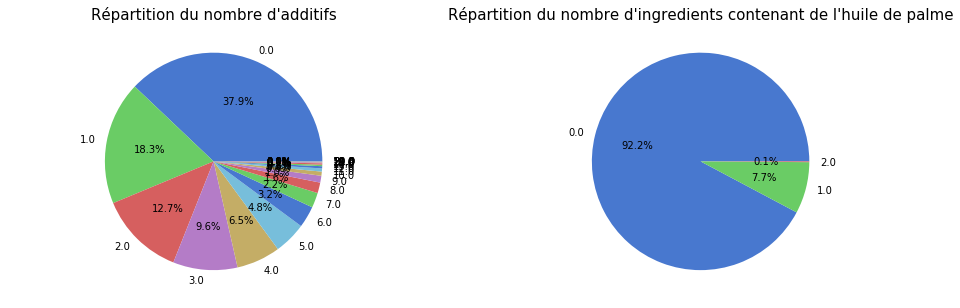

In [12]:
counts = (data.groupby('additives_n')['additives_n'].count())
figure = plt.figure(figsize=[16,5])
plt.subplot(1, 2, 1)
plt.title("Répartition du nombre d'additifs",fontsize=15)
plt.axis('equal')
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

counts = (data.groupby("ingredients_from_palm_oil_n")["ingredients_from_palm_oil_n"].count())
plt.subplot(1, 2, 2)
plt.title("Répartition du nombre d'ingredients contenant de l'huile de palme",fontsize=15)
plt.axis('equal')
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.show()

Nous allons donc analyser ces deux variables sur les ranges [0, 4] et [0, 2].

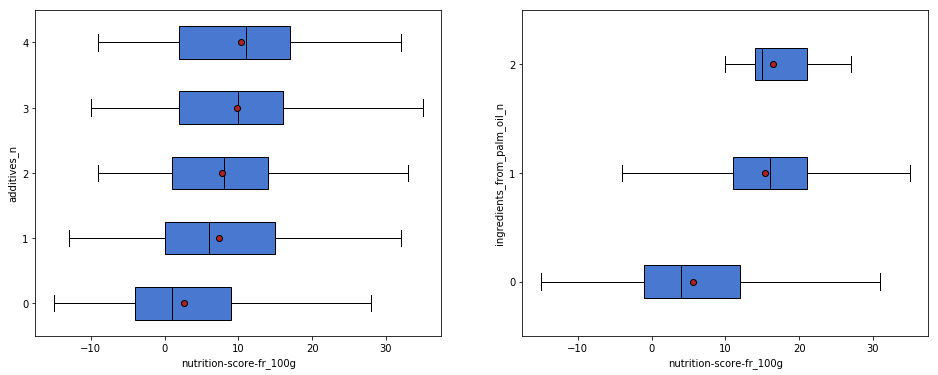

In [13]:
modalites = [0, 1, 2, 3, 4]
plt.figure(figsize=[16,6])

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['additives_n'] == m]['nutrition-score-fr_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(1, 2, 1)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('additives_n')

modalites = [0, 1, 2]

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['ingredients_from_palm_oil_n'] == m]['nutrition-score-fr_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(1, 2, 2)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('ingredients_from_palm_oil_n')
    
plt.show()  

On remarque que la plus grande différence se trouve entre 0 additif et 1 additif. Il pourrait être intéressant dans
notre modèle de regarder si l'ajout d'une colonne additives? qui prend les valeurs 0 ou 1 permet d'améliorer nos 
prédictions plutôt que de marquer le nombre d'additifs par ingrédient.

Cette remarque s'applique également pour les ingrédients contenant de l'huile de palme du fait du faible nombre de valeurs supérieures à 1.

Cette étude clotûre notre analyse univariée.

## Analyse multivariée
Commençons par visualiser nos données à l'aide d'un pairplot.

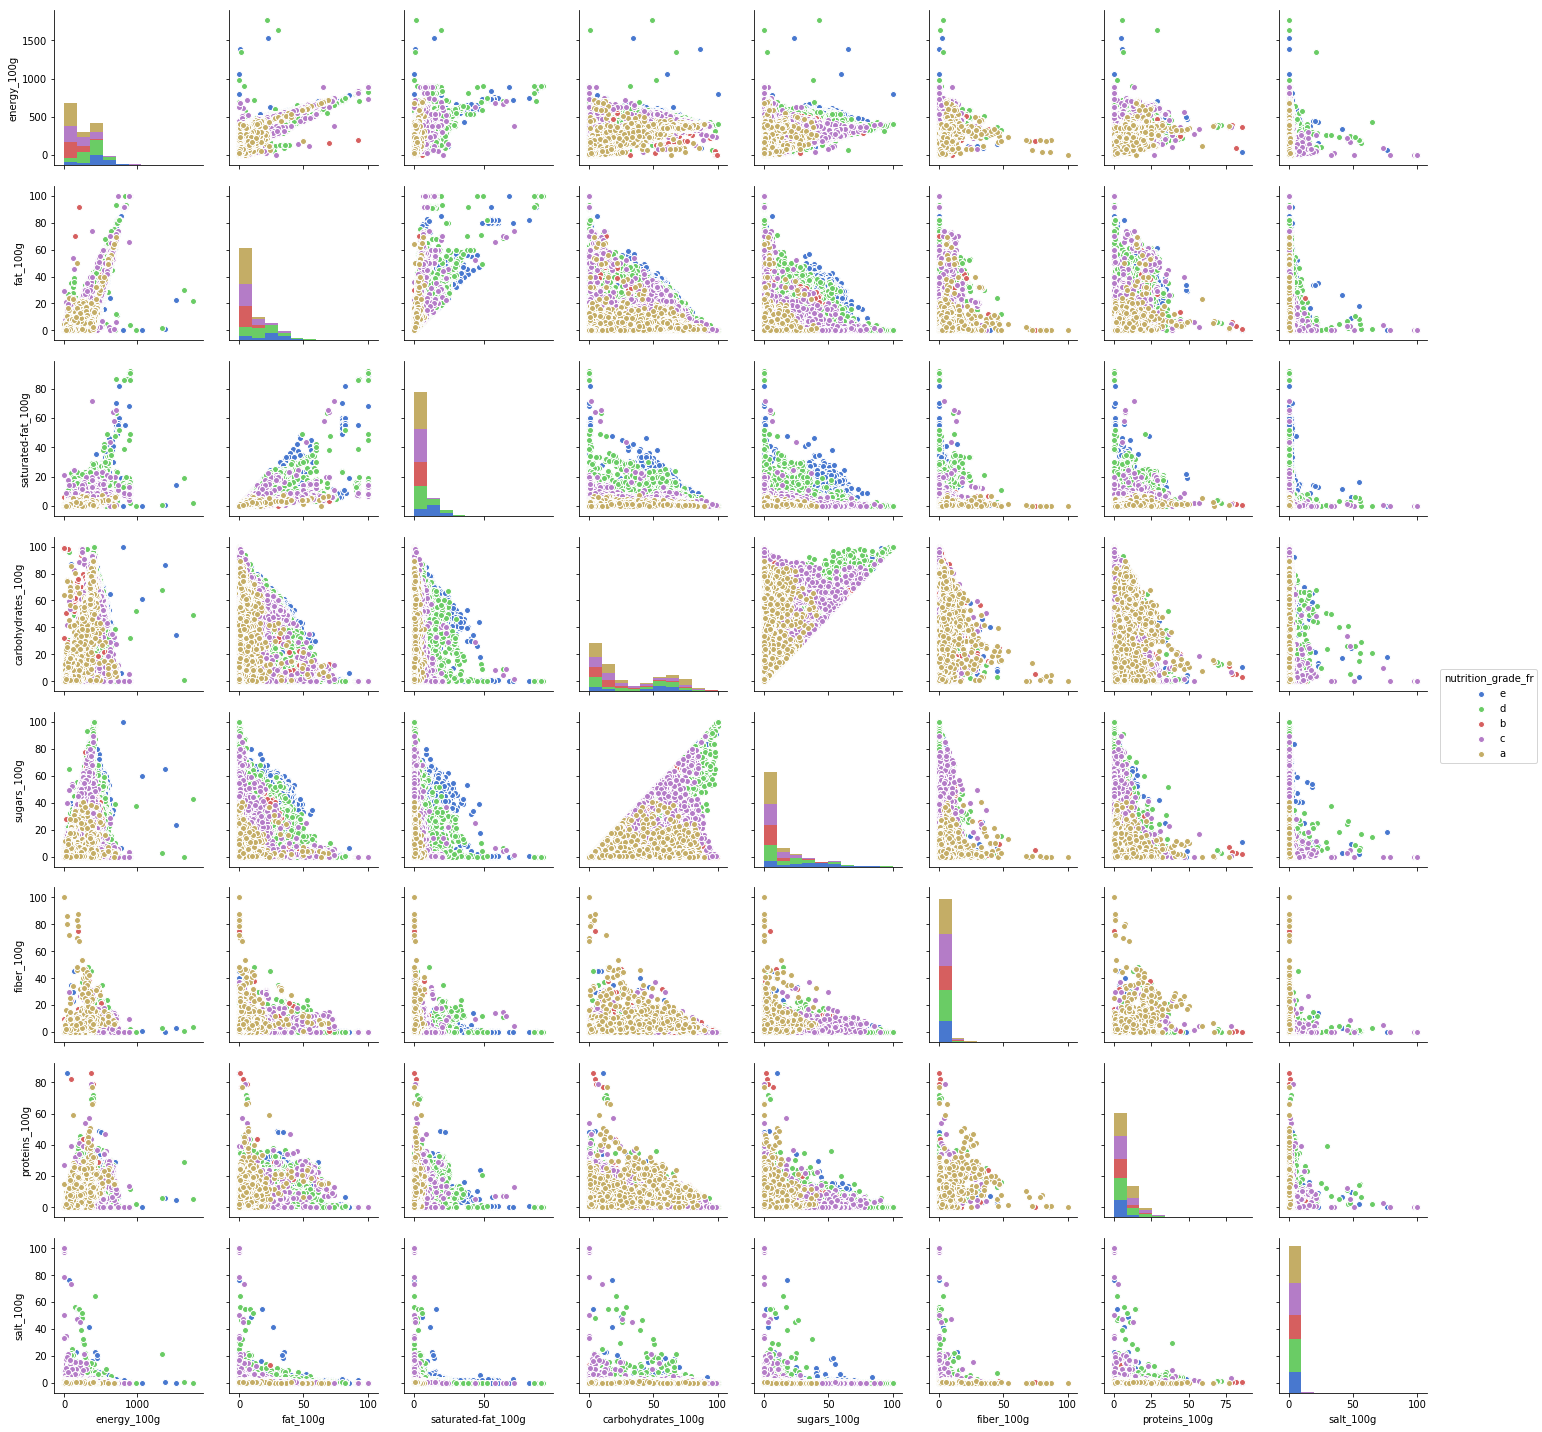

In [14]:
plt.figure(figsize=[16,12])
sns.pairplot(data.loc[:, "nutrition_grade_fr":"salt_100g"].dropna(),hue = 'nutrition_grade_fr')

Ce graphe reprend finalement ce que nous avions pu voir précédemment, si ce n'est qu'ici la relation "enfant"-"parent" est particulièrement visible pour les sucres et les glucides par exemple. On remarque aussi par exemple que les fibres et le sel sont rarement présents en même temps dans les aliments.

Afin d'ajouter à nos graphes une composante numérique regardons désormais les corrélations entre variables à l'aide de la corrélation de Pearson.

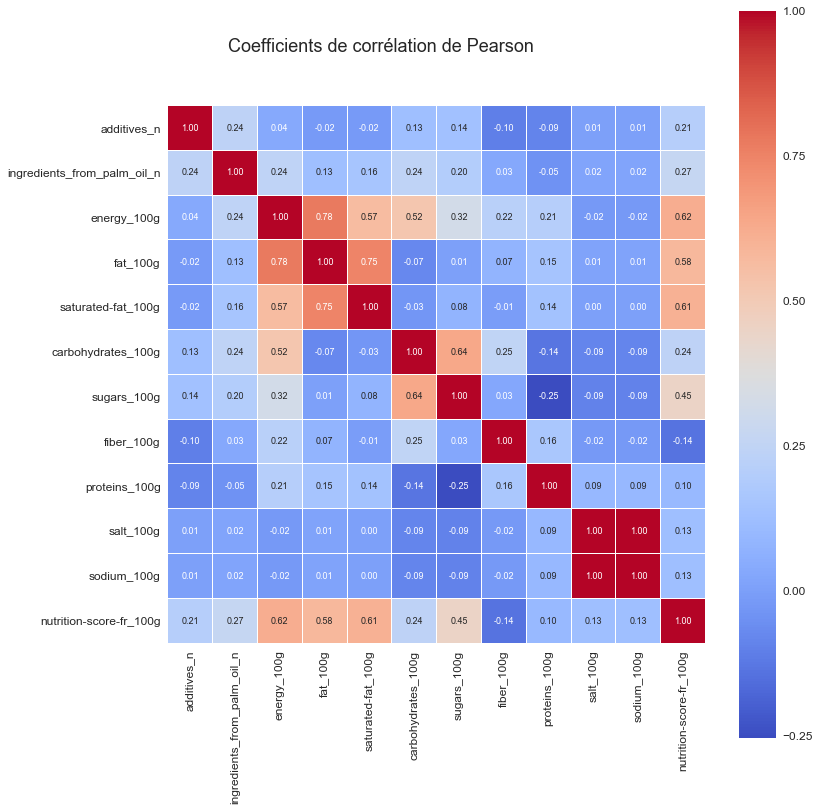

In [15]:
sns.set(font_scale = 1.2)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.45, 0.93, "Coefficients de corrélation de Pearson", ha='center', fontsize = 18)
sns.heatmap(corrmat, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 9}, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

On peut remarquer que la nutritrion_grade_fr et le nutrition_score_fr_100g sont parfaitement corrélés. Toutefois, 
puisqu'ici nous ne savons pas encore quelle variable intéressera le plus notre client décidons de garder les deux. De
plus selon les études que nous faisons, il est parfois plus utile d'avoir une variable discrète ou continue.

On remarque que le gras, le sucre et l'énergie ont une forte influence sur le score de nutrition (ce que nous avions déjà pu voir auparavant). Le seul élément ayant une contribution négative sont les fibres. Ces trois variables seront donc clefs dans la consitution de recettes saines. 

Le gras et l'énergie sont également fortement corrélés ce qui n'étaient pas forcément évident. On peut supposer que
cela provient de barres de céréales, ou de barres énergétiques fortement sucrées.

La présence d'additifs ou d'huile de palme ne semble pas être aussi corrélée avec le score que nous le pensions.

En revanche il n'est pas nécessaire de garder et le sel et le sodium tant ces indicateurs sont similaires. Décidons donc de ne garder que le sel puisqu'il inclus le sodium.

In [16]:
data = data.drop(columns=["sodium_100g"])

### Protéines et Carbohydrates

Les coefficients de corrélation de Pearson ne pouvant détecter que la linéarité des relations entre variables nous
allons ici étudier à l'aide d'un nuage de points les relations score-protéines et score-carbohydrates pour s'assurer 
qu'elles ne sont bien que faiblement corrélées.

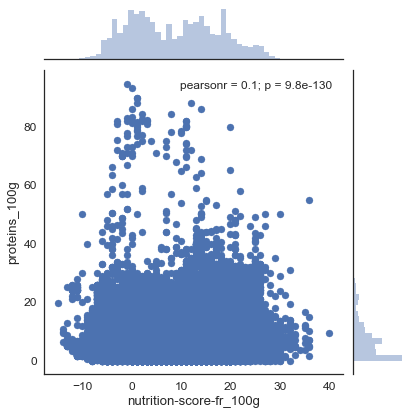

In [17]:
with sns.axes_style('white'):
    sns.jointplot("nutrition-score-fr_100g", "proteins_100g", data=data)

On voit bien ici qu'il est compliqué de tirer une conclusion sur la distribution de notre nuage de points. Cela confirme ce que nous avions vu grâce aux coefficients de corrélation de Pearson mais également dans notre analyse globale. Cela s'explique sûrement par le fait que si les protéines sont importantes pour la santé on les retrouve aussi bien dans des éléments sains que nocifs. On les trouve notamment dans la viande rouge qui souvent riche en gras et à consommer avec modération. D'où une faible corrélation avec le score. 

Cela peut être intéressant d'ajouter une nouvelle colonne gras non saturé qui sera donc la soustraction du gras et du gras saturé. Nous ajouterons cela dans la partie feature engineering.

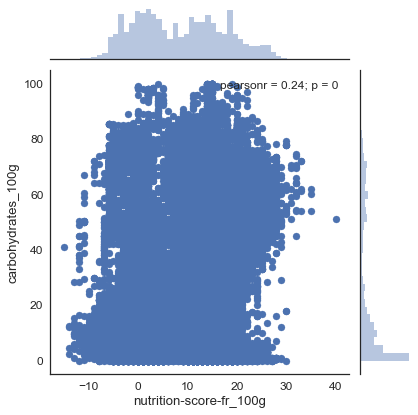

In [18]:
with sns.axes_style('white'):
    sns.jointplot("nutrition-score-fr_100g", "carbohydrates_100g", data=data)

En faisant la même étude on se rend compte que Les carbohydrates semblent avoir un effet plutôt négatif que positif mais difficile là encore d'en tirer une vraie conclusion.

Cela peut s'expliquer du fait qu'il y a des sucres dans les éléments sains (sucres lents) et d'autres moins bons à consommer (sucres rapides).

Cela peut être intéressant d'ajouter une nouvelle colonne sucre lent qui sera donc la soustraction des carbohydrates et du sucre. Nous ajouterons cela dans la partie feature engineering.

### Entreprises
Regardons s'il est possible de classer les entreprises en fonction de leur score et d'y trouver une corrélation. Pour cela nous n'allons prendre en compte que les entreprises ayant au moins 5 produits afin de ne pas fausser notre analyse.

In [19]:
brands = data.loc[:,["brands_tags", "nutrition-score-fr_100g"]].dropna().groupby("brands_tags").agg(['mean', 'count'])
brands[brands["nutrition-score-fr_100g"]["count"] > 5 ]["nutrition-score-fr_100g"]["mean"].sort_values()

brands_tags
notre-jardin,marque-repere,scamark-filiale-e-leclerc        -7.200000
saint-eloi,selection-des-mousquetaires,les-mousquetaires    -6.166667
montebello                                                  -5.666667
granoro                                                     -5.444444
marque-repere,notre-jardin                                  -5.333333
panzani,ebro-foods,panzani-les-3-minutes                    -5.250000
barilla,barilla-piccolini                                   -5.000000
le-bon-semeur                                               -5.000000
notre-jardin,marque-repere                                  -4.951923
jean-nicolas                                                -4.923077
barilla,la-collezione-d-italia                              -4.900000
lustucru,pastacorp                                          -4.666667
vivien-paille                                               -4.654545
sabarot                                                     -4.611111
lazzaret

Comme on pouvait s'y attendre, Kinder, Ferrero, Lindt, entreprises de chocolat ont un score de nutrition élevé. Au 
contraire on retrouve des marques bio dans les scores les plus faibles. Il est donc bien possible de trouver une corrélation entre l'entreprise et le score. Ce graphique clos notre analyse multivariée.

## Feature Engineering
Comme discuté précédemment nous allons ajouter deux colonnes : gras non-saturé et sucre lent.

In [20]:
data["slow_sugars_100g"] = data["carbohydrates_100g"] - data["sugars_100g"]
data["unsaturated-fat_100g"] = data["fat_100g"] - data["saturated-fat_100g"]

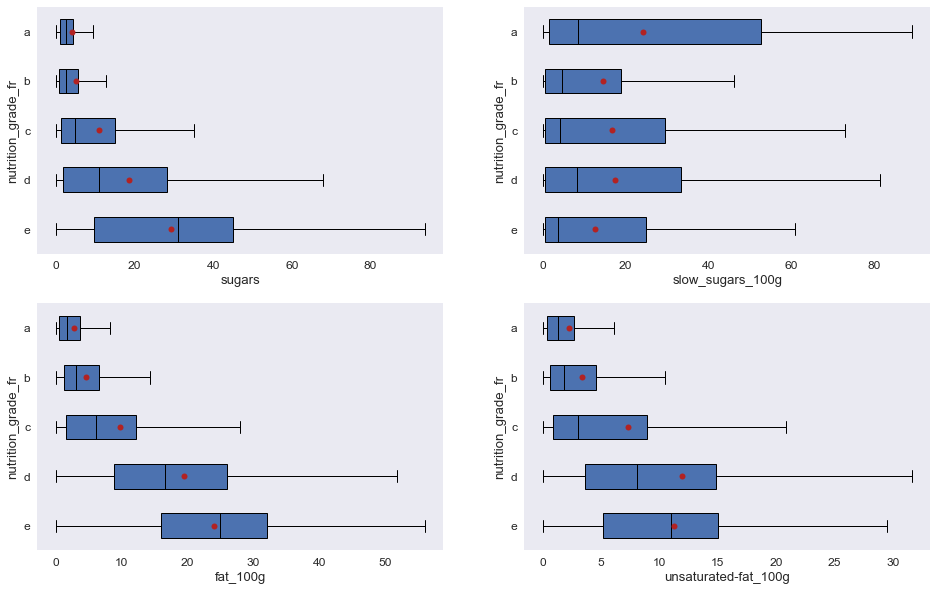

In [21]:
modalites = ["e", "d", "c", "b", "a"]
plt.figure(figsize=[16,10])

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]['sugars_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(2, 2, 1)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('sugars')
plt.ylabel('nutrition_grade_fr')
plt.grid(False)

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]["slow_sugars_100g"].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(2, 2, 2)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("slow_sugars_100g")
plt.ylabel('nutrition_grade_fr')
plt.grid(False)

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]['fat_100g'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(2, 2, 3)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('fat_100g')
plt.ylabel('nutrition_grade_fr')
plt.grid(False)

groupes = []
for m in modalites:
    groupes.append(data.dropna()[data.dropna()['nutrition_grade_fr'] == m]["unsaturated-fat_100g"].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.subplot(2, 2, 4)
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.xlabel("unsaturated-fat_100g")
plt.ylabel('nutrition_grade_fr')
plt.grid(False)


plt.show()

On remarque comme on l'avait supposé que les boites à moustache concernant le sucre et le sucre lent sont très différentes. Ainsi les produits de grade a sont les plus riches en sucres lents et les plus pauvres en sucres rapides. Ce qui explique pourquoi des marques de pates sont bien classées dans notre liste d'entreprises alors que celles-ci contiennent tout de même du sucre.

L'analyse concernant le gras est moins évidente, les deux graphes de boites à moustaches ayant des allures similaires (plus resséré concernant les gras non saturés).

Ainsi il est à conseiller de garder au moins la colonne sucre lent dans notre dataset.